In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [6]:
df = pd.read_csv('barnet_shaleData.csv', sep = "\t")
df.head()

,Depth(ft),Density (g/cc)
0,100.5,1.8778
1,101.0,1.8709
2,101.5,1.8317
3,102.0,1.8363
4,102.5,1.8500


In [12]:
df.describe()

,Depth(ft),Density (g/cc)
count,12197.000000,12187.000000
mean,3149.500000,2.555832
std,1760.557476,0.243150
min,100.500000,1.425300
25%,1625.000000,2.587800
50%,3149.500000,2.632500
75%,4674.000000,2.656500
max,6198.500000,4.628800


In [26]:
df[(df['Depth(ft)'] == 5300)]

,Depth(ft),Density (g/cc)
10399,5300.0,2.6105


In [37]:
barnett_depth = df['Depth(ft)']
barnett_density = df['Density (g/cc)']  #  densities in g/cm³
barnett_surface_density = 1.8778  # g/cm³

# Add surface data point for Barnett
barnett_depth = np.insert(barnett_depth, 0, 0)
barnett_density = np.insert(barnett_density, 0, barnett_surface_density)

In [40]:
barnett_depth[:5], barnett_density[:5]

(array([  0. , 100.5, 101. , 101.5, 102. ]),
 array([1.8778, 1.8778, 1.8709, 1.8317, 1.8363]))

In [19]:
df_mexico = pd.read_csv('Gulf_MexicoData.csv', sep ='\t')
df_mexico

,Depth(ft),Density (g/cc)
0,3515,2.154
1,3516,2.126
2,3517,2.098
3,3518,2.063
4,3519,2.084
...,...,...
9581,13096,2.314
9582,13097,2.314
9583,13098,2.294
9584,13099,2.294


In [24]:
df_mexico.max()

Depth(ft)         13100.000
Density (g/cc)        3.188
dtype: float64

In [27]:
df_mexico[(df_mexico['Depth(ft)'] == 8200)]

,Depth(ft),Density (g/cc)
4685,8200,2.364


In [23]:
df_mexico.mean()

Depth(ft)         8307.500000
Density (g/cc)       2.277519
dtype: float64

In [31]:
def plot_raw_data(xi, yi, ax):
    """plot x vs y on axes ax, 
    add axes labels and turn on grid
    """
    ax.plot(xi, yi, 'ko', label='raw data')
    ax.set_xlabel('$density$', fontsize=16)
    ax.set_ylabel('$depth$', fontsize=16)
    ax.grid(True)


Text(0.5, 1.0, 'Plot of Depth against density for Barnet Shale Data')

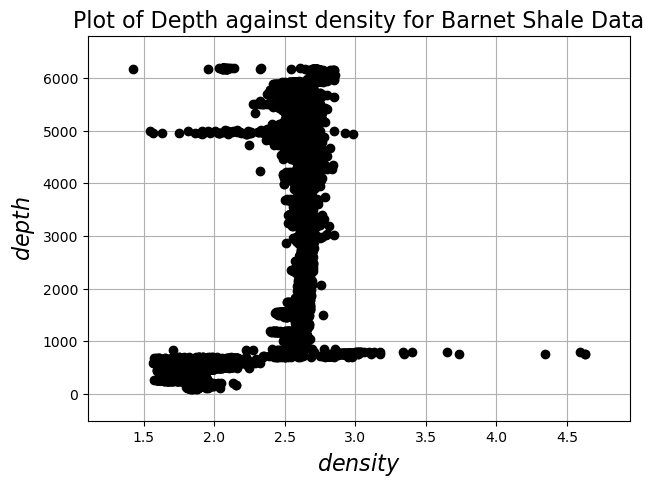

In [32]:
# set up figure
fig = plt.figure(figsize=(7, 5))
ax1 = fig.add_subplot(111)

# For clarity we are going to add a small margin to all the plots.
ax1.margins(0.1)

# plot the raw data
plot_raw_data(df['Density (g/cc)'],df['Depth(ft)'], ax1)

# add a figure title
ax1.set_title('Plot of Depth against density for Barnet Shale Data', fontsize=16)

Text(0.5, 1.0, 'Plot of Depth against density for Gulf of Mexico Data')

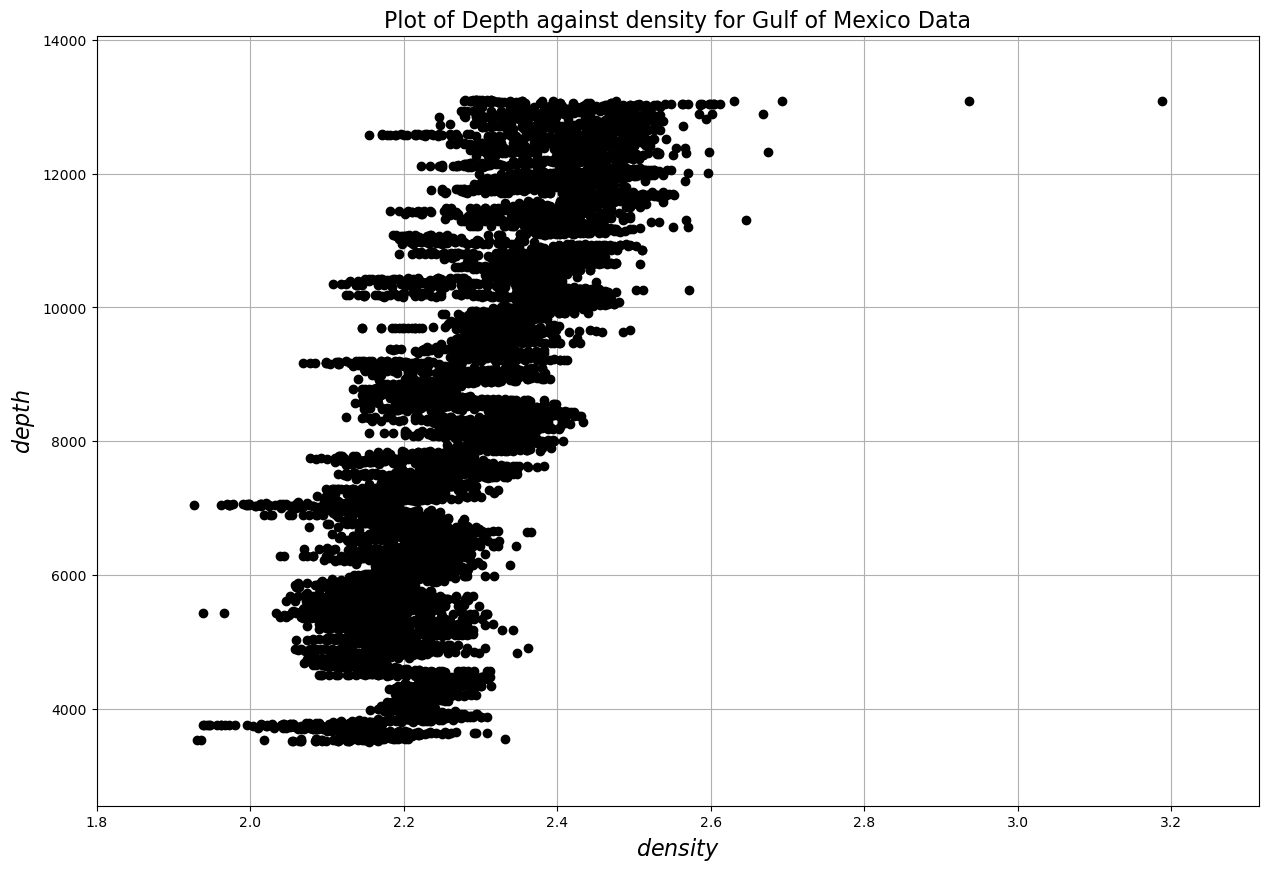

In [36]:
# set up figure
fig = plt.figure(figsize=(15, 10))
ax1 = fig.add_subplot(111)

# For clarity we are going to add a small margin to all the plots.
ax1.margins(0.1)

# plot the raw data
plot_raw_data(df_mexico['Density (g/cc)'],df_mexico['Depth(ft)'], ax1)

# add a figure title
ax1.set_title('Plot of Depth against density for Gulf of Mexico Data', fontsize=16)

In [41]:
def block_density(depth, density, num_blocks=5):
    # Divide depth range into equal blocks
    depth_min, depth_max = depth[0], depth[-1]
    block_edges = np.linspace(depth_min, depth_max, num_blocks + 1)
    block_densities = []
    block_depths = []

    for i in range(num_blocks):
        # Get data within the block
        mask = (depth >= block_edges[i]) & (depth < block_edges[i + 1])
        avg_density = np.mean(density[mask])  # Average density for the block
        block_densities.append(avg_density)
        block_depths.append((block_edges[i] + block_edges[i + 1]) / 2)  # Midpoint of block

    return np.array(block_depths), np.array(block_densities)

In [42]:
# Block the Barnett data
barnett_block_depth, barnett_block_density = block_density(barnett_depth, barnett_density)

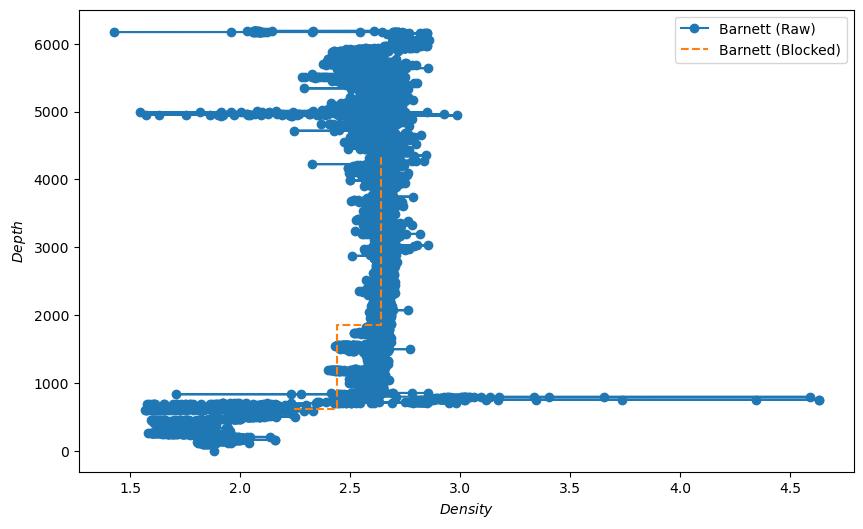

In [47]:
# Plot the raw and blocked data for both datasets
plt.figure(figsize=(10, 6))

# Barnett Data
plt.plot(barnett_density, barnett_depth, label='Barnett (Raw)', marker='o', linestyle='-')
plt.step(barnett_block_density, barnett_block_depth, label='Barnett (Blocked)', where='mid', linestyle='--')
plt.xlabel("$Density$")
plt.ylabel("$Depth$")
plt.legend();